# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   *   data set diperoleh dari kaggle  https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
*   **Tanpa label**: Dataset tidak boleh memiliki label atau kelas ✔
*   **Jumlah Baris**: Dataset yang saya gunakan mempunyai data 8128 baris ✔
*   **Tipe Data**: Harus mengandung data kategorikal dan numerikal ✔
 - Numerikal: year, selling_price, km_driven, seats.
 - Kategorikal: fuel, seller_type, transmission, owner.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

**Jawab**

**1. Sumber Dataset**

*   data set diperoleh dari kaggle  https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv


**2. Ketentuan Dataset:**

*   **Tanpa label**: Dataset tidak boleh memiliki label atau kelas ✔
*   **Jumlah Baris**: Dataset yang saya gunakan mempunyai data 8129 baris ✔
*   **Tipe Data**: Harus mengandung data kategorikal dan numerikal ✔
 - Numerikal: year, selling_price, km_driven, seats.
 - Kategorikal: fuel, seller_type, transmission, owner.

Pembatasan:

Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan ✔

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math  
from yellowbrick.cluster import KElbowVisualizer 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans,AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [295]:
CarDetails_df = pd.read_csv("Dataset_inisiasi.csv")
CarDetails_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

1. **Memahami Struktur Data**

In [296]:
CarDetails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Dari hasil output **df.info()**, dataset ini terdiri atas 8128 baris dan 13 kolom. Berikut adalah detail dari setiap kolom.

1. tipe data numerik (float64 & int64): year, selling_price, km_driven dan seats.

2. tipe data Kategorikal (object): name, fuel, seller_type, transmission, owner, mileage, engine, max_power, torque.

2. **Menangani Data yang Hilang**  

In [297]:
total_rows = CarDetails_df.shape[0]
missing_data = CarDetails_df.isnull().sum()
percent_missing = (missing_data / total_rows) * 100 

# Membuat DataFrame baru untuk hasil
missing_values_df = pd.DataFrame({
    'Jumlah Data Hilang': missing_data,
    'Persentase Data Hilang': percent_missing.map('{:.2f}%'.format)
})

# Menampilkan tabel
print(missing_values_df)

               Jumlah Data Hilang Persentase Data Hilang
name                            0                  0.00%
year                            0                  0.00%
selling_price                   0                  0.00%
km_driven                       0                  0.00%
fuel                            0                  0.00%
seller_type                     0                  0.00%
transmission                    0                  0.00%
owner                           0                  0.00%
mileage                       221                  2.72%
engine                        221                  2.72%
max_power                     215                  2.65%
torque                        222                  2.73%
seats                         221                  2.72%


In [298]:
# Mengecek jumlah data duplikat
duplicate_count = CarDetails_df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

Jumlah data duplikat: 1202


In [299]:
CarDetails_df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


**Insight**

- Saat memeriksa **missing value** ternyata banyak missing values pada beberapa kolom utama yaitu : mileage, engine, max_power, torque dan seats

- Jumlah data duplikat: 1202

- Berdasarkan hasil statistik deskriptif yang ditampilkan oleh df.describe(), dapat dilihat beberapa informasi penting mengenai kolom-kolom numerik dalam dataset.

1. Mayoritas mobil dalam dataset diproduksi antara tahun 2011-2017, menunjukkan bahwa sebagian besar data berasal dari mobil yang masih relatif baru.

2. Harga jual bervariasi secara signifikan, dengan rentang yang sangat luas dari puluhan ribu hingga jutaan.

3. Jarak tempuh juga sangat bervariasi, menunjukkan bahwa dataset mencakup mobil dengan kondisi yang sangat beragam (baik baru maupun bekas pakai dalam waktu lama).

4. Sebagian besar mobil memiliki 5 kursi, yang menunjukkan bahwa mayoritas mobil dalam dataset adalah jenis sedan atau SUV standar.

3. **Analisis Distribusi dan Korelasi** 

In [300]:
print(CarDetails_df.dtypes)

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object


dari struktur data yang ditampilkan, dataset ini terdiri dari berbagai jenis fitur, termasuk kategori (object), numerik diskrit (int64), dan numerik kontinu (float64). name, fuel, seller_type, transmission, owner, mileage, engine, max_power dan torque bersifat kategorikal atau object. Year, selling_price, dan km_driven merupakan data numerik yang bisa digunakan sebagai variabel input dalam analisis prediktif atau clustering.

In [301]:
numerical_features = [col for col in CarDetails_df.columns if CarDetails_df[col].dtype in ['int64', 'float64']]

# Statistik deskriptif
print("Statistik Deskriptif:")
print(CarDetails_df[numerical_features].describe())

Statistik Deskriptif:
              year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000


dataset ini berisi 8.128 entri dengan variabel utama seperti tahun produksi, harga jual, jarak tempuh (km_driven), dan jumlah kursi (seats). rata-rata tahun produksi mobil adalah 2013, dengan rentang dari 1983 hingga 2020. Harga jual bervariasi secara signifikan, mulai dari 29.999.000 hingga 10.000.000.000, dengan harga median sekitar 450.000.000.

Jarak tempuh mobil juga sangat bervariasi, dengan rata-rata 69.819 km dan maksimum 2.360.457 km, menunjukkan adanya beberapa outlier. Untuk jumlah kursi, mayoritas mobil memiliki 5 kursi, meskipun ada beberapa model dengan kapasitas hingga 14 kursi.

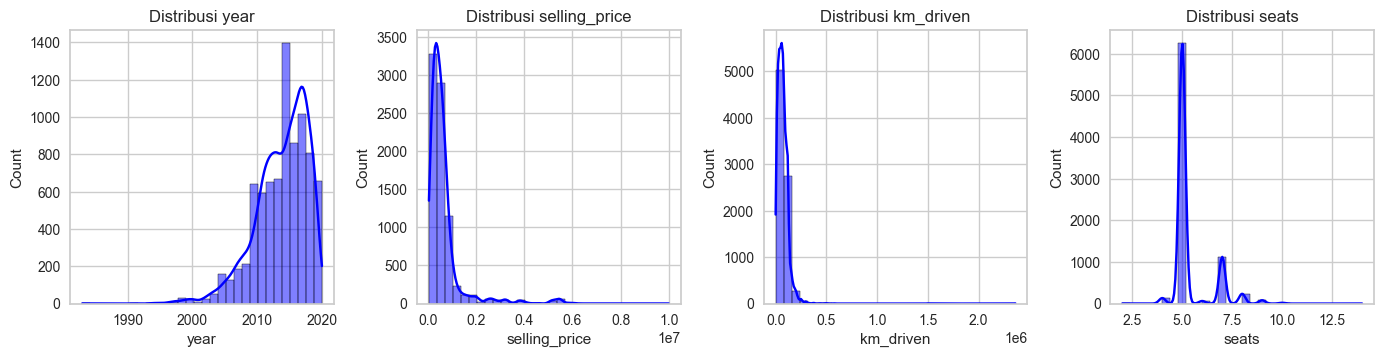

In [302]:
# Menentukan kolom dengan kategori (numerik)
num_features = CarDetails_df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(CarDetails_df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

grafik histogram menunjukkan distribusi tahun produksi kendaraan dengan mayoritas berada antara tahun 2010–2020. Ini mengindikasikan bahwa sebagian besar mobil dalam dataset tergolong baru. harga jual kendaraan menunjukkan distribusi yang sangat tidak merata, dengan mayoritas harga berada di rentang bawah, tetapi ada beberapa kendaraan dengan harga yang jauh lebih tinggi, menandakan adanya outlier. kilometer tempuh kendaraan cenderung rendah pada sebagian besar data, dengan beberapa outlier yang memiliki jarak tempuh sangat tinggi. kapasitas kursi kendaraan didominasi oleh mobil dengan 5 kursi, sementara kendaraan dengan lebih dari 5 kursi merupakan minoritas.

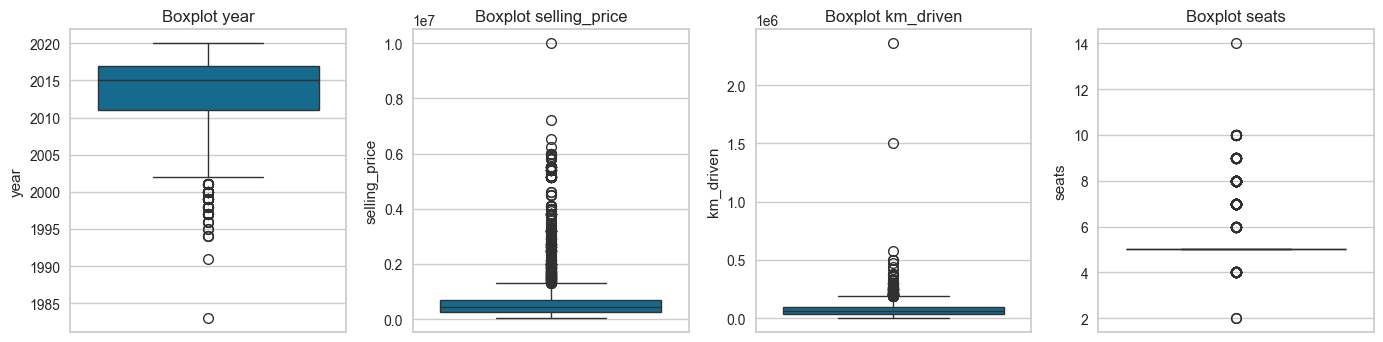

In [303]:
# Membuat visualisasi boxplot
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=CarDetails_df[column])
    plt.title(f'Boxplot {column}')
plt.tight_layout()
plt.show()

tahun kendaraan sebelum 2005 memiliki jumlah yang sangat sedikit dan dianggap sebagai outlier. harga jual memiliki beberapa kendaraan dengan nilai ekstrem yang jauh lebih tinggi dari kebanyakan kendaraan lain dalam dataset. kilometer tempuh juga menunjukkan keberadaan kendaraan yang memiliki jarak tempuh jauh di atas rata-rata.

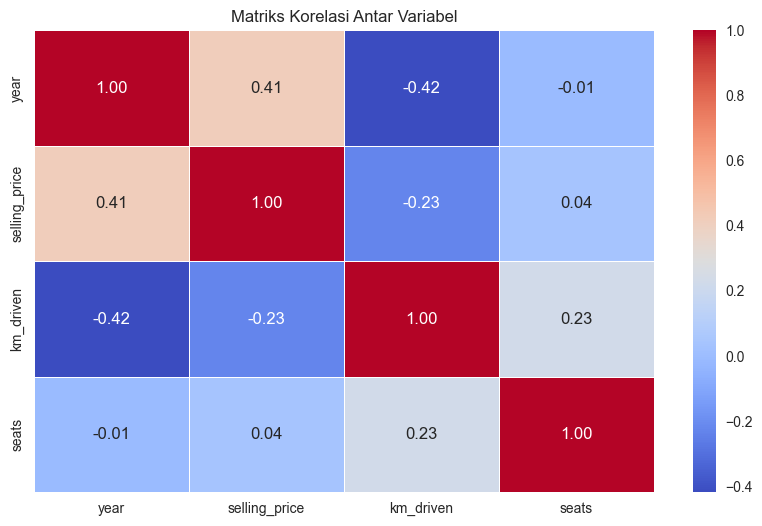

In [304]:

# Heatmap korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
sns.heatmap(num_features.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel")
plt.show()

heatmap korelasi menunjukkan bahwa terdapat korelasi positif antara year dan selling_price (0.41), menandakan bahwa kendaraan yang lebih baru cenderung memiliki harga jual lebih tinggi. Sebaliknya, terdapat korelasi negatif antara km_driven dan selling_price (-0.23), yang berarti kendaraan dengan jarak tempuh lebih tinggi cenderung memiliki harga jual yang lebih rendah.

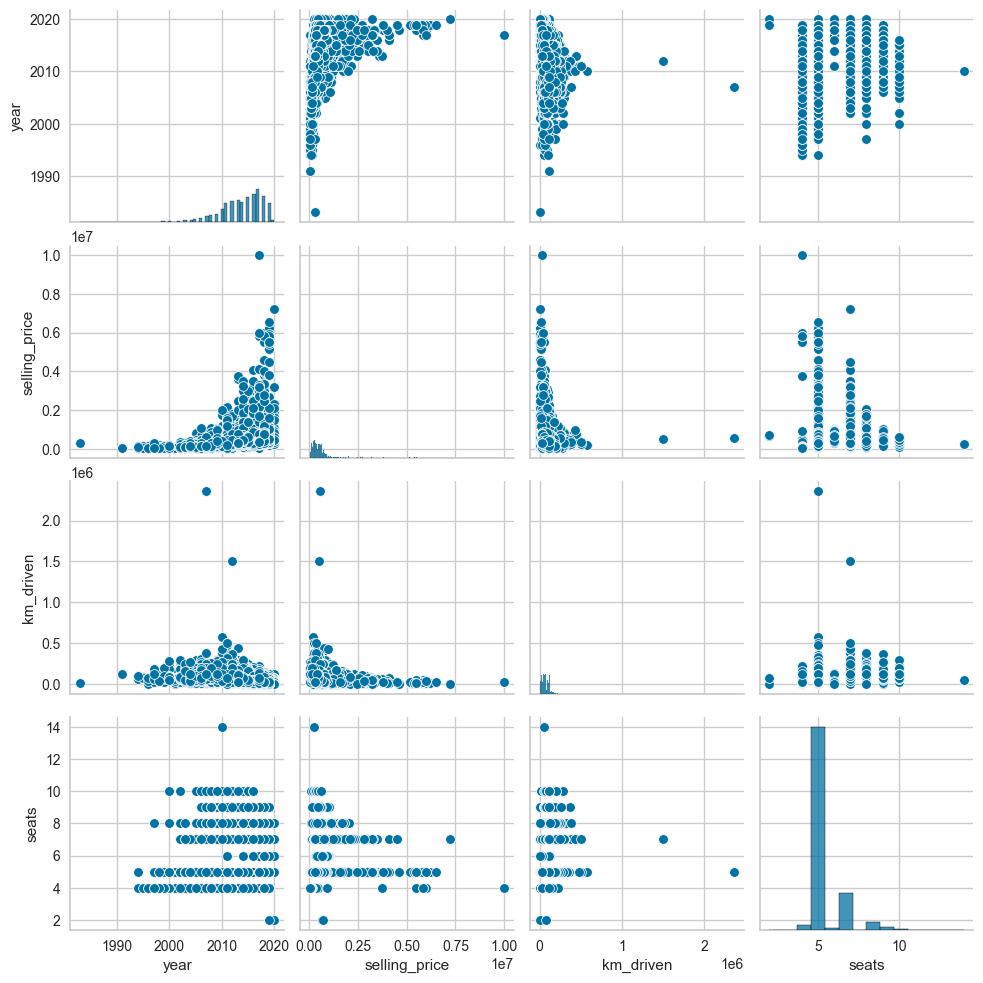

In [305]:

# Menentukan fitur numerik dalam dataset
num_features = CarDetails_df.select_dtypes(include=['number'])  # Ubah menjadi DataFrame
# Pairplot untuk fitur numerik
sns.pairplot(num_features)
plt.show()

dari scatter plot antar-variabel, terlihat bahwa hubungan antara selling_price dan year menunjukkan tren positif, dengan kendaraan yang lebih baru cenderung memiliki harga yang lebih tinggi. Sementara itu, hubungan antara selling_price dan km_driven menunjukkan pola sebaliknya, di mana kendaraan dengan kilometer tempuh tinggi cenderung memiliki harga yang lebih rendah. Scatter plot juga mengonfirmasi bahwa mayoritas kendaraan memiliki 5 kursi, dengan hanya sedikit kendaraan yang memiliki lebih dari 5 kursi.

4. **Visualisasi Data**  

C:\Users\User\AppData\Local\Temp\ipykernel_11372\3841167377.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=CarDetails_df[col], data=CarDetails_df[CarDetails_df[col].isin(top_10.index)], palette='viridis', order=top_10.index, ax=axes[i])
C:\Users\User\AppData\Local\Temp\ipykernel_11372\3841167377.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=CarDetails_df[col], data=CarDetails_df[CarDetails_df[col].isin(top_10.index)], palette='viridis', order=top_10.index, ax=axes[i])
C:\Users\User\AppData\Local\Temp\ipykernel_11372\3841167377.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue`

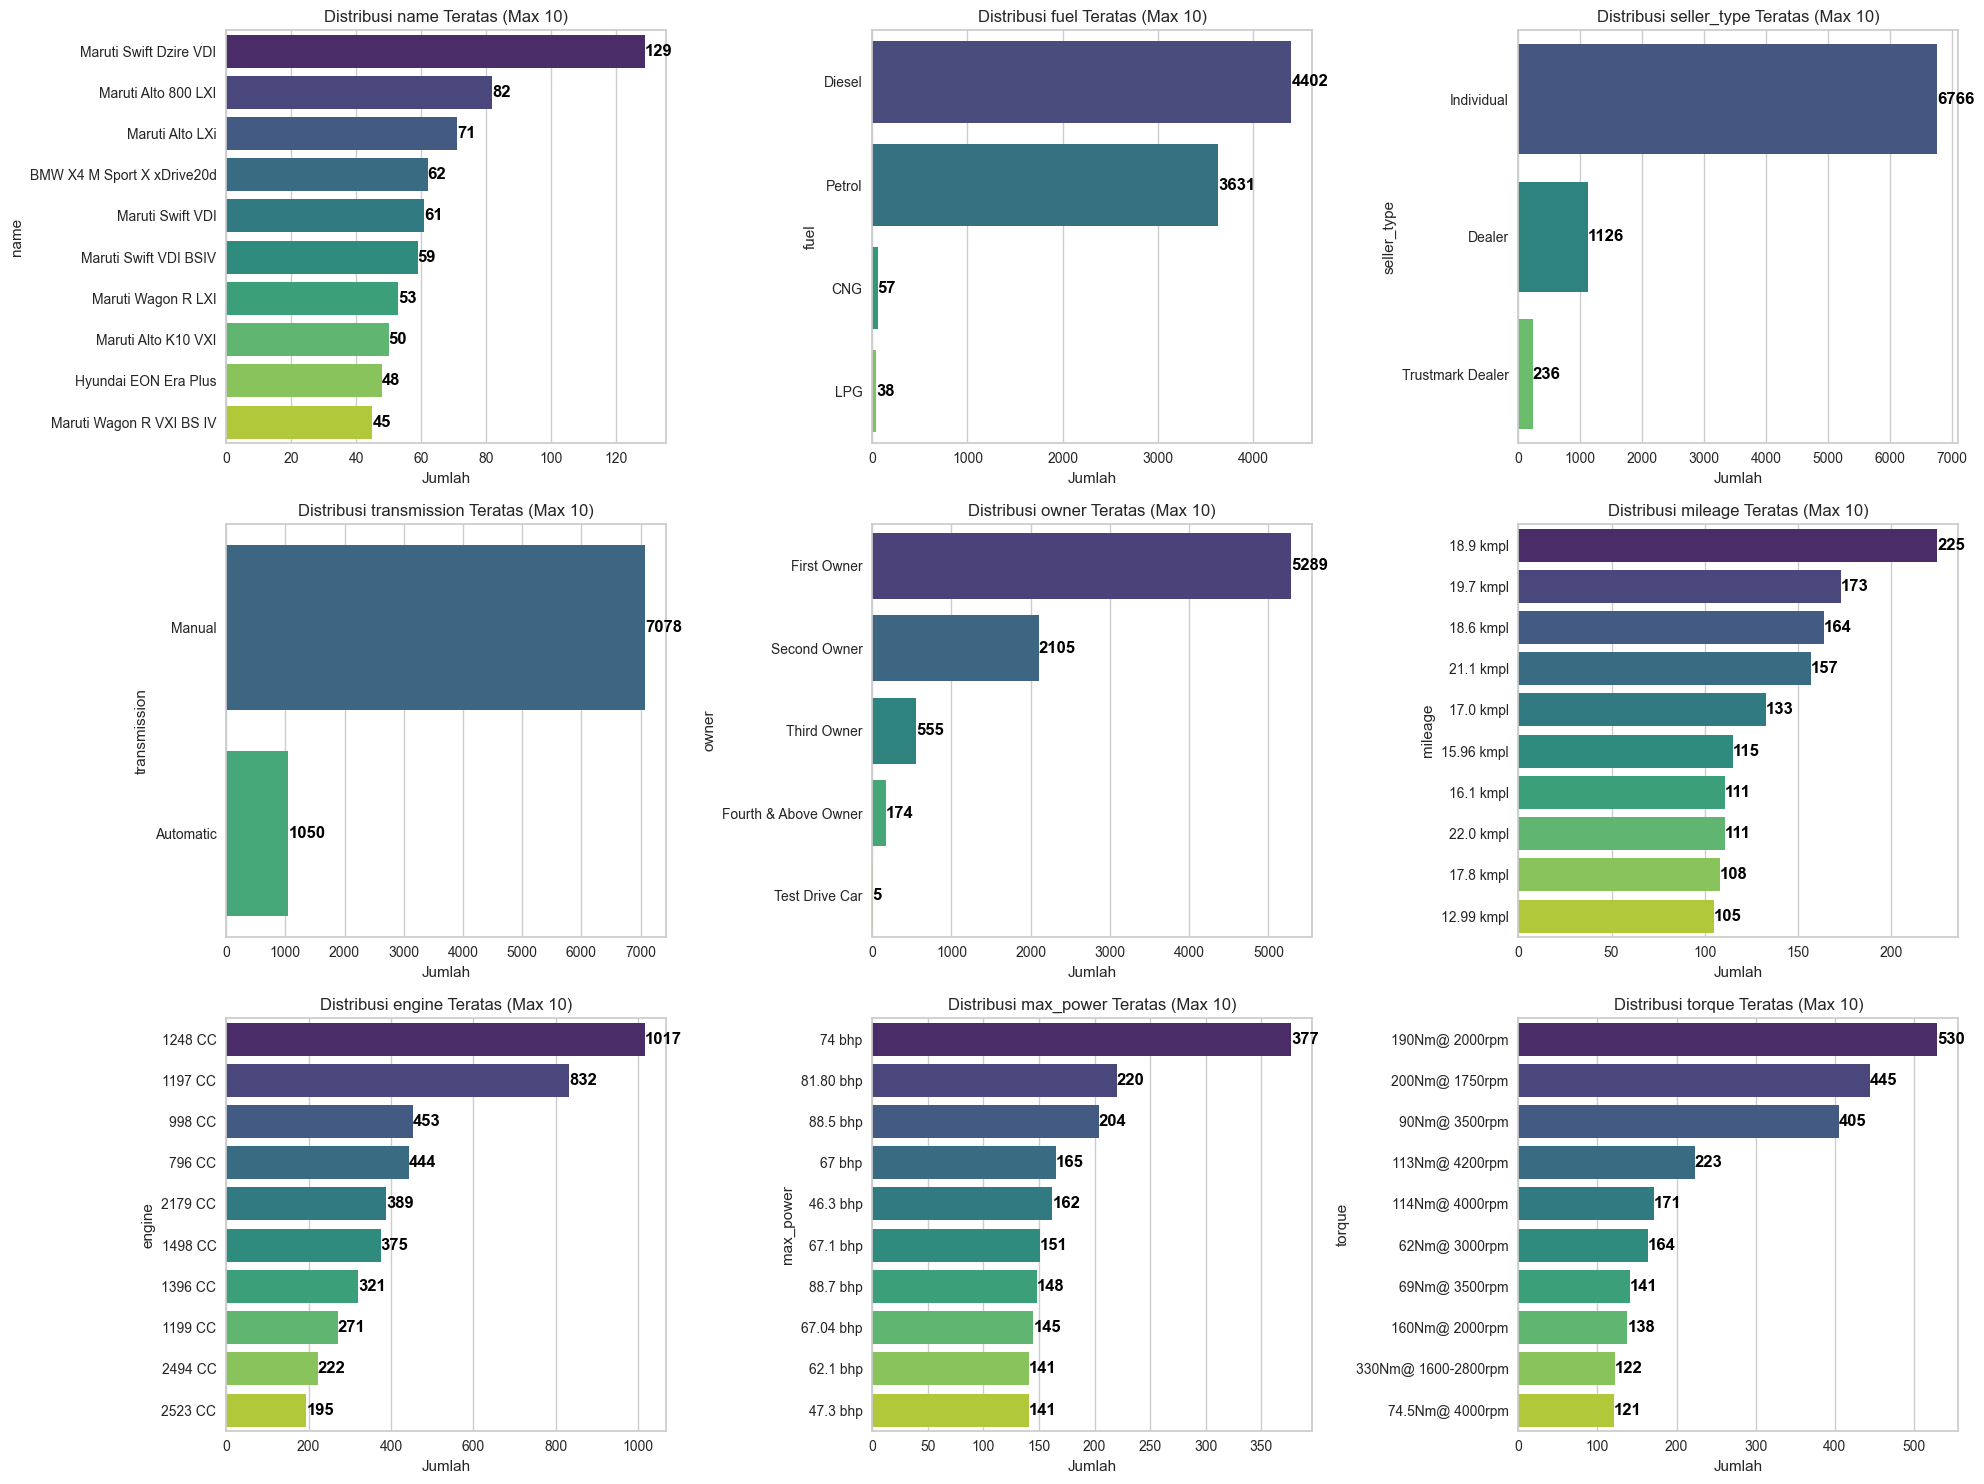

In [306]:
object_cols = CarDetails_df.select_dtypes(include=['object']).columns

# Menentukan jumlah baris dan kolom dalam grid subplot
num_cols = len(object_cols)
cols_per_row = 3  # Maksimum 3 plot per baris
num_rows = math.ceil(num_cols / cols_per_row)  # Hitung jumlah baris yang dibutuhkan

# Membuat figure dan axes untuk subplot
fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(20, 5 * num_rows))
axes = axes.flatten()  # Flatten agar mudah diiterasi

# Looping untuk membuat countplot pada subplot yang berbeda
for i, col in enumerate(object_cols):
    top_10 = CarDetails_df[col].value_counts().nlargest(10)  # Ambil 10 kategori teratas
    sns.countplot(y=CarDetails_df[col], data=CarDetails_df[CarDetails_df[col].isin(top_10.index)], palette='viridis', order=top_10.index, ax=axes[i])

    # Menambahkan angka di atas setiap batang
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_width())}', 
                         (p.get_width(), p.get_y() + p.get_height() / 2), 
                         ha='left', va='center', fontsize=12, color='black', weight='bold')

    axes[i].set_title(f'Distribusi {col} Teratas (Max 10)')
    axes[i].set_xlabel('Jumlah')
    axes[i].set_ylabel(col)

# Hapus subplot kosong jika jumlah kolom tidak habis dibagi jumlah baris
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Menghapus axis kosong agar tidak tampil

plt.tight_layout()
plt.show()

grafik di atas menunjukkan distribusi beberapa variabel kategorikal dalam dataset:
- **name** Maruti Swift Dzire VDI menjadi model mobil dengan jumlah terbanyak (129 unit), diikuti oleh Maruti Alto 800 LXI dan Maruti Alto LXI.
- **jenis** Bahan Bakar: Diesel mendominasi dengan 4.402 unit, diikuti oleh Petrol (3.631 unit), sedangkan CNG dan LPG jauh lebih sedikit.
- **seller_tyoe** Sebagian besar mobil dijual oleh individu (6.766 unit), sedangkan dealer dan trustmark dealer hanya memiliki porsi kecil.
- **transmission** Mobil dengan transmisi manual jauh lebih banyak (7.078 unit) dibandingkan otomatis (1.050 unit).
- **owner** Sebelumnya Mobil dengan pemilik pertama mendominasi (5.289 unit), sedangkan mobil dengan lebih dari tiga pemilik sangat sedikit.
- **mileage** Mobil dengan efisiensi bahan bakar tertinggi adalah 18.9 kmpl (225 unit), sedangkan lainnya berkisar antara 12.99 kmpl hingga 22.0 kmpl.
- **engine** berkapasitas 1248 CC paling umum (1.017 unit), diikuti oleh 1197 CC dan 998 CC.
- **max_power** Mayoritas mobil memiliki daya 74 bhp (377 unit), dengan variasi lain di kisaran 47-88 bhp.
- **torque** maksimum Mobil dengan torsi 190Nm@2000rpm mendominasi (530 unit), sedangkan lainnya berkisar antara 74.5Nm hingga 330Nm.

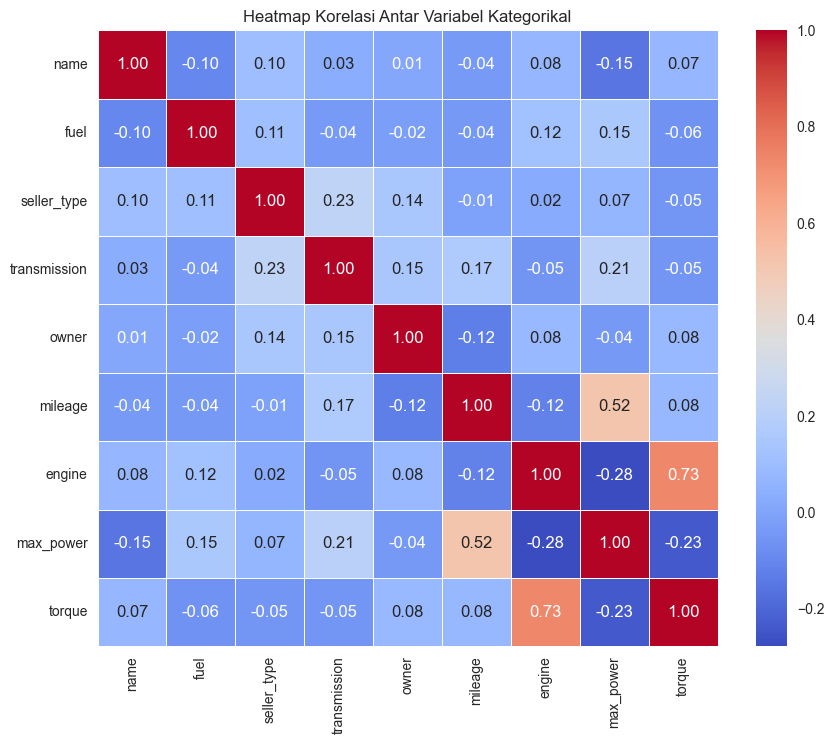

In [307]:
# Membuat salinan dataset untuk encoding
df_encoded_visualization = CarDetails_df.copy()

object_cols = CarDetails_df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in object_cols:
    le = LabelEncoder()
    df_encoded_visualization[col] = le.fit_transform(df_encoded_visualization[col])
    label_encoders[col] = le

# Menghitung matriks korelasi
corr_matrix = df_encoded_visualization[object_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Kategorikal")
plt.show()

heatmap korelasi di atas menunjukkan hubungan antar variabel dalam dataset CarDetails_df. Terdapat korelasi kuat antara engine dan torque (0.73), serta mileage dan max_power (0.52), yang mengindikasikan bahwa mesin dengan kapasitas lebih besar cenderung memiliki torsi lebih tinggi, sementara daya maksimum juga berhubungan dengan efisiensi bahan bakar. Korelasi lainnya relatif rendah, seperti antara transmission dan max_power (0.21), menunjukkan hubungan lemah antara jenis transmisi dan tenaga mesin. Secara keseluruhan, tidak ada korelasi yang sangat tinggi selain yang disebutkan, menandakan bahwa sebagian besar variabel dalam dataset tidak terlalu bergantung satu sama lain.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

1. **Menghapus atau Menangani Data Kosong (Missing Values)**


In [308]:
# Mengisi nilai NaN dengan nilai yang paling sering muncul (modus)
for col in ['mileage', 'engine', 'max_power']:
    CarDetails_df[col].fillna(CarDetails_df[col].mode()[0], inplace=True)

# Menghapus kolom yang tidak diperlukan dalam clustering
# CarDetails_df.drop(columns=["torque", "name", "seats", 'year'], inplace=True)
CarDetails_df.drop(columns=['torque', 'name','seats'], inplace=True)

# Verifikasi hasil
print("missing value :\n", CarDetails_df.isna().sum())


missing value :
 year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_11372\301597691.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  CarDetails_df[col].fillna(CarDetails_df[col].mode()[0], inplace=True)


In [309]:
total_rows = CarDetails_df.shape[0]
missing_data = CarDetails_df.isnull().sum()
percent_missing = (missing_data / total_rows) * 100 

# Membuat DataFrame baru untuk hasil
missing_values_df = pd.DataFrame({
    'Jumlah Data Hilang': missing_data,
    'Persentase Data Hilang': percent_missing.map('{:.2f}%'.format)
})

# Menampilkan tabel
print(missing_values_df)

               Jumlah Data Hilang Persentase Data Hilang
year                            0                  0.00%
selling_price                   0                  0.00%
km_driven                       0                  0.00%
fuel                            0                  0.00%
seller_type                     0                  0.00%
transmission                    0                  0.00%
owner                           0                  0.00%
mileage                         0                  0.00%
engine                          0                  0.00%
max_power                       0                  0.00%



1. missing value
    - mengisi **missing value** pada beberapa kolom utama yaitu : mileage, engine dan max_power
    - mengahpus kolom torque karena memiliki teks yang bervariasi
    - menghapus kolom seats karena rentang ilai yang sangat kecil

2. **Menghapus Data Duplikat**


In [310]:
print("Jumlah data duplikat: ", CarDetails_df.duplicated().sum())
print(f"Jumlah data sebelum duplikat dihapus: {CarDetails_df.shape}")
CarDetails_df.drop_duplicates(inplace=True)
print(f"Jumlah data setelah duplikat dihapus: {CarDetails_df.shape}")


Jumlah data duplikat:  1222
Jumlah data sebelum duplikat dihapus: (8128, 10)
Jumlah data setelah duplikat dihapus: (6906, 10)


Jumlah data adalah 8128 data dari 11 fitur, terindikasi data duplikat sebanyak 1222. setelah dibersihkan data menjadi 6906


3. **Normalisasi atau Standarisasi Fitur**

In [311]:
numerical_features = CarDetails_df.select_dtypes(include=['int64', 'float64']).columns

scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

data_minmax = CarDetails_df.copy()
data_standard = CarDetails_df.copy()

data_minmax[numerical_features] = scaler_minmax.fit_transform(CarDetails_df[numerical_features])
data_standard[numerical_features] = scaler_standard.fit_transform(CarDetails_df[numerical_features])

print("Normalisasi dengan MinMaxScaler:")
print(data_minmax[numerical_features].head())
print("\nStandarisasi dengan StandardScaler:")
print(data_standard[numerical_features].head())

Normalisasi dengan MinMaxScaler:
       year  selling_price  km_driven
0  0.837838       0.042126   0.061640
1  0.837838       0.034102   0.050837
2  0.621622       0.012839   0.059310
3  0.729730       0.019559   0.053803
4  0.648649       0.010030   0.050837

Standarisasi dengan StandardScaler:
       year  selling_price  km_driven
0  0.143039      -0.129605   1.225184
1  0.143039      -0.283346   0.788227
2 -1.817421      -0.690759   1.130939
3 -0.837191      -0.562001   0.908176
4 -1.572363      -0.744569   0.788227


In [312]:
data_minmax[numerical_features] = scaler_minmax.inverse_transform(data_minmax[numerical_features])
data_standard[numerical_features] = scaler_standard.inverse_transform(data_standard[numerical_features])

# Tampilkan data setelah inversi untuk memastikan nilai kembali normal
print("\nData setelah inversi (MinMaxScaler):")
print(data_minmax[numerical_features].head())

print("\nData setelah inversi (StandardScaler):")
print(data_standard[numerical_features].head())


Data setelah inversi (MinMaxScaler):
     year  selling_price  km_driven
0  2014.0       450000.0   145500.0
1  2014.0       370000.0   120000.0
2  2006.0       158000.0   140000.0
3  2010.0       225000.0   127000.0
4  2007.0       130000.0   120000.0

Data setelah inversi (StandardScaler):
     year  selling_price  km_driven
0  2014.0       450000.0   145500.0
1  2014.0       370000.0   120000.0
2  2006.0       158000.0   140000.0
3  2010.0       225000.0   127000.0
4  2007.0       130000.0   120000.0


melakukan normalisasi Min-Max Scaling atau Z-Score Scaling pada fitur numerik seperti selling_price, km_driven, mileage, engine, dan max_power agar semua fitur berada dalam skala yang sama.


4. **Deteksi dan Penanganan Outlier**

In [313]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Menghapus outlier pada semua fitur numerik
data_no_outliers = CarDetails_df.copy()
for col in numerical_features:
    data_no_outliers = remove_outliers_iqr(data_no_outliers, col)

print("Data setelah menghapus outlier:")
print(data_no_outliers.describe())

Data setelah menghapus outlier:
              year  selling_price      km_driven
count  6344.000000   6.344000e+03    6344.000000
mean   2013.517497   4.391814e+05   70305.460908
std       3.748016   2.496913e+05   39767.594034
min    2002.000000   3.150400e+04       1.000000
25%    2011.000000   2.450000e+05   40000.000000
50%    2014.000000   4.000000e+05   70000.000000
75%    2017.000000   6.000000e+05  100000.000000
max    2020.000000   1.225000e+06  190000.000000


<Figure size 1200x800 with 0 Axes>

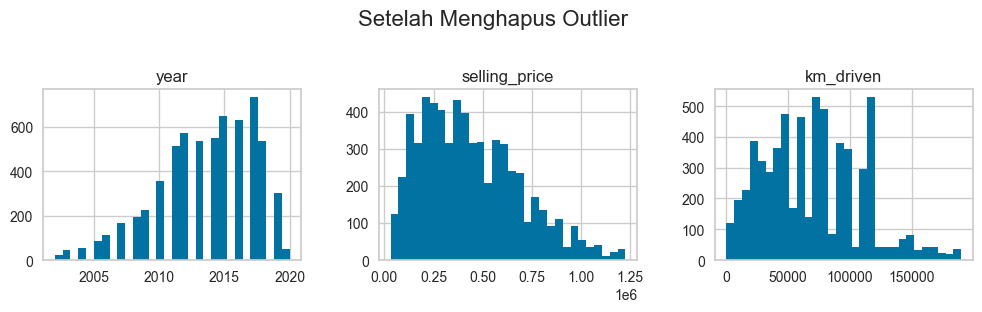

In [314]:
# Visualisasi distribusi setelah penanganan outlier
plt.figure(figsize=(12, 8))
data_no_outliers[numerical_features].hist(bins=30, figsize=(12, 8), layout=(3, 3))
plt.suptitle("Setelah Menghapus Outlier", fontsize=16)
plt.show()


In [315]:
CarDetails_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8125
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           6906 non-null   int64 
 1   selling_price  6906 non-null   int64 
 2   km_driven      6906 non-null   int64 
 3   fuel           6906 non-null   object
 4   seller_type    6906 non-null   object
 5   transmission   6906 non-null   object
 6   owner          6906 non-null   object
 7   mileage        6906 non-null   object
 8   engine         6906 non-null   object
 9   max_power      6906 non-null   object
dtypes: int64(3), object(7)
memory usage: 593.5+ KB


sebelumnya terdeteksi outlier dalam fitur selling_price, km_driven, dan mileage dengan nilai yang extream ditangani dengan menggunakan winsorizing untuk membatasi outlier dengan nilai batas tertentu


5. **Encoding Data Kategorikal**

In [316]:

# Hapus satuan menjadi 234
CarDetails_df['mileage'] = CarDetails_df['mileage'].str.extract('(\d+\.\d+|\d+)').astype(float)
CarDetails_df['engine'] = CarDetails_df['engine'].str.extract('(\d+)').astype(float)
CarDetails_df['max_power'] = CarDetails_df['max_power'].str.extract('(\d+\.\d+|\d+)').astype(float)

CarDetails_df["transmission"] = CarDetails_df["transmission"].map({"Manual": 1, "Automatic": 2})
CarDetails_df["fuel"] = CarDetails_df["fuel"].map({"Diesel": 1, "Petrol": 2, "CNG": 3, "LPG": 4})
categorical_features = [ "seller_type" ,"owner"]
numerical_features = ["year", "selling_price", "km_driven","fuel","transmission", "mileage", "engine", "max_power"]

# One-Hot Encoding untuk data kategorikal
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_categorical = encoder.fit_transform(CarDetails_df[categorical_features])

# Standardisasi fitur numerik
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(CarDetails_df[numerical_features])

# penggabunan hasil encoding & scaling
X = np.hstack((scaled_numerical, encoded_categorical))

# Menampilkan bentuk akhir data yang siap digunakan
print(f"Shape of Processed Data: {X.shape}")


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_11372\1746034666.py:2: SyntaxWarning: invalid escape sequence '\d'
  CarDetails_df['mileage'] = CarDetails_df['mileage'].str.extract('(\d+\.\d+|\d+)').astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_11372\1746034666.py:3: SyntaxWarning: invalid escape sequence '\d'
  CarDetails_df['engine'] = CarDetails_df['engine'].str.extract('(\d+)').astype(float)
C:\Users\User\AppData\Local\Temp\ipykernel_11372\1746034666.py:4: SyntaxWarning: invalid escape sequence '\d'
  CarDetails_df['max_power'] = CarDetails_df['max_power'].str.extract('(\d+\.\d+|\d+)').astype(float)


Shape of Processed Data: (6906, 14)


In [317]:
CarDetails_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8125
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6906 non-null   int64  
 1   selling_price  6906 non-null   int64  
 2   km_driven      6906 non-null   int64  
 3   fuel           6906 non-null   int64  
 4   seller_type    6906 non-null   object 
 5   transmission   6906 non-null   int64  
 6   owner          6906 non-null   object 
 7   mileage        6906 non-null   float64
 8   engine         6906 non-null   float64
 9   max_power      6905 non-null   float64
dtypes: float64(3), int64(5), object(2)
memory usage: 593.5+ KB


In [318]:
print("Jumlah nilai NaN sebelum penanganan:\n", CarDetails_df['max_power'].isna().sum())
CarDetails_df['max_power'].fillna(CarDetails_df['max_power'].mode()[0], inplace=True)
print("Jumlah nilai NaN setelah penanganan:\n", CarDetails_df['max_power'].isna().sum())


Jumlah nilai NaN sebelum penanganan:
 1
Jumlah nilai NaN setelah penanganan:
 0


C:\Users\User\AppData\Local\Temp\ipykernel_11372\334804499.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  CarDetails_df['max_power'].fillna(CarDetails_df['max_power'].mode()[0], inplace=True)


In [319]:
# One-Hot Encoding untuk kategori dengan sedikit nilai unik
low_cardinality_cols = [col for col in CarDetails_df.select_dtypes(include=['object']).columns if CarDetails_df[col].nunique() <= 10]
encoder = OneHotEncoder(sparse_output=False, drop='first')
one_hot_encoded = pd.DataFrame(encoder.fit_transform(CarDetails_df[low_cardinality_cols]), columns=encoder.get_feature_names_out(low_cardinality_cols), index=CarDetails_df.index)

# Label Encoding untuk kategori dengan banyak nilai unik
label_encoded = CarDetails_df.copy()
for col in CarDetails_df.select_dtypes(include=['object']).columns:
    if CarDetails_df[col].nunique() > 10:
        label_encoded[col] = LabelEncoder().fit_transform(CarDetails_df[col])

# Gabungkan hasil encoding
encoded_data = label_encoded.drop(columns=low_cardinality_cols).join(one_hot_encoded)

numerical_features = ["year", "selling_price", "km_driven","fuel","transmission", "mileage", "engine", "max_power"]
scaled_numerical = StandardScaler().fit_transform(CarDetails_df[numerical_features])

# Gabungkan fitur numerik & kategorikal yang sudah diproses
X = np.hstack((scaled_numerical, encoded_data.drop(columns=numerical_features).values))

# Hasil akhir
print(f"Shape of Processed Data: {X.shape}")
print("Sample Encoded Data:")
print(pd.DataFrame(X).head())

Shape of Processed Data: (6906, 14)
Sample Encoded Data:
         0         1         2         3         4         5         6   \
0  0.143039 -0.129605  1.225184 -0.872215 -0.303934  0.990525 -0.364442   
1  0.143039 -0.283346  0.788227 -0.872215 -0.303934  0.424100  0.149215   
2 -1.817421 -0.690759  1.130939  0.957529 -0.303934 -0.438070  0.147161   
3 -0.837191 -0.562001  0.908176 -0.872215 -0.303934  0.890272 -0.060357   
4 -1.572363 -0.744569  0.788227  0.957529 -0.303934 -0.839079 -0.261711   

         7    8    9    10   11   12   13  
0 -0.424978  1.0  0.0  0.0  0.0  0.0  0.0  
1  0.515337  1.0  0.0  0.0  1.0  0.0  0.0  
2 -0.297564  1.0  0.0  0.0  0.0  0.0  1.0  
3  0.084678  1.0  0.0  0.0  0.0  0.0  0.0  
4  0.027342  1.0  0.0  0.0  0.0  0.0  0.0  


Proses preprocessing pada dataset CarDetails_df dilakukan dengan dua metode encoding untuk variabel kategorikal: One-Hot Encoding untuk kategori dengan sedikit nilai unik dan Label Encoding untuk kategori dengan banyak nilai unik. Fitur numerik kemudian distandardisasi agar memiliki skala yang seragam. Setelah itu, hasil encoding dan scaling digabungkan, menghasilkan dataset dengan bentuk (6906, 14), siap digunakan untuk analisis atau pemodelan lebih lanjut.

6. **Binning (Pengelompokan Data)**

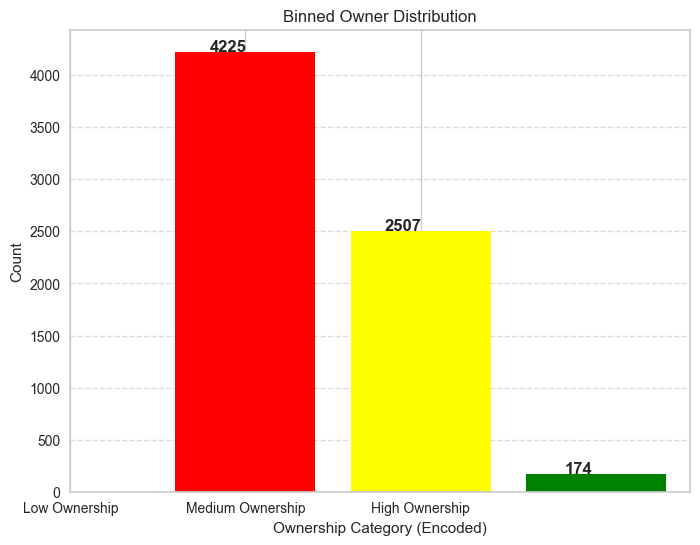

In [320]:
def categorize_owner(owner):
    if owner == 'First Owner':
        return 1  # Low Ownership
    elif owner in ['Second Owner', 'Third Owner']:
        return 2  # Medium Ownership
    else:
        return 3  # High Ownership

# Mengubah kategori menjadi angka
CarDetails_df['owner_category'] = CarDetails_df['owner'].apply(categorize_owner)

# Menghitung jumlah masing-masing kategori
owner_bins = CarDetails_df['owner_category'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(owner_bins.index, owner_bins.values, color=['red', 'yellow', 'green'])

# Menambahkan label pada tiap bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 0.1, str(bar.get_height()), 
             ha='center', fontsize=12, fontweight='bold')

# Label sumbu
plt.xlabel("Ownership Category (Encoded)")
plt.ylabel("Count")
plt.title("Binned Owner Distribution")
plt.xticks(ticks=[0, 1, 2], labels=['Low Ownership', 'Medium Ownership', 'High Ownership'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**OWNER**
1. Low Ownership (First Owner) mendominasi pasar mobil bekas, menunjukkan bahwa banyak pengguna lebih memilih membeli mobil bekas dari pemilik pertama.

2. Medium Ownership (Second & Third Owner) memiliki jumlah sedang, yang berarti ada banyak pengguna yang menjual mobil setelah pemakaian beberapa tahun.

3. High Ownership jumlahnya jauh lebih sedikit, karena mobil dengan banyak pemilik cenderung mengalami kerusakan atau kecacatan yang lebih tinggi.

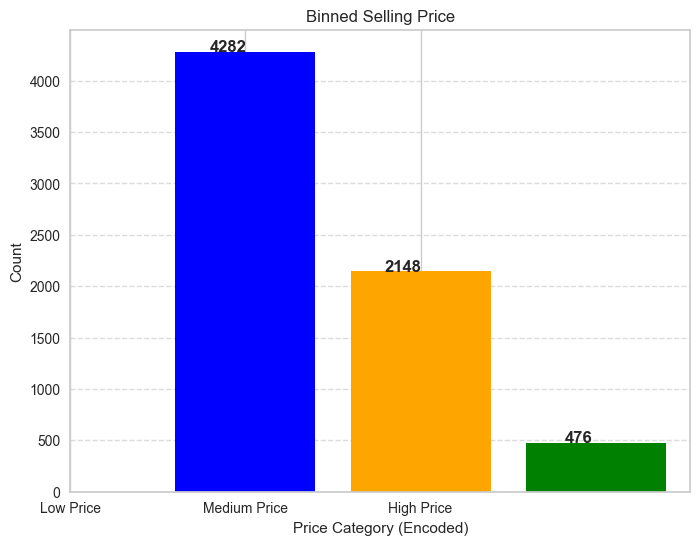

In [321]:
def categorize_price(price):
    if price <= 500000:
        return 1  # Low Price
    elif 500000 < price <= 1000000:
        return 2  # Medium Price
    else:
        return 3  # High Price

# Terapkan fungsi ke dataset dan ubah ke tipe int64
CarDetails_df['price_category'] = CarDetails_df['selling_price'].apply(categorize_price).astype('int64')

# Hitung jumlah masing-masing kategori
price_bins = CarDetails_df['price_category'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(price_bins.index, price_bins.values, color=['blue', 'orange', 'green'])

# Tambahkan label pada tiap bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height() + 0.1, str(bar.get_height()), 
             ha='center', fontsize=12, fontweight='bold')

# Label sumbu
plt.xlabel("Price Category (Encoded)")
plt.ylabel("Count")
plt.title("Binned Selling Price")
plt.xticks(ticks=[0, 1, 2], labels=['Low Price', 'Medium Price', 'High Price'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**SELLING PRICE**

Grafik menunjukkan distribusi mobil berdasarkan kategori harga: Low Price (≤ 500,000), Medium Price (500,000 - 1,000,000), dan High Price (> 1,000,000). Mayoritas mobil termasuk dalam kategori Low Price (4,293 unit), diikuti oleh Medium Price (2,157 unit), dan paling sedikit dalam High Price (476 unit). Ini menunjukkan bahwa sebagian besar mobil dalam dataset berada di kisaran harga rendah hingga menengah, yang dapat mencerminkan preferensi pasar atau ketersediaan mobil bekas dengan harga terjangkau.

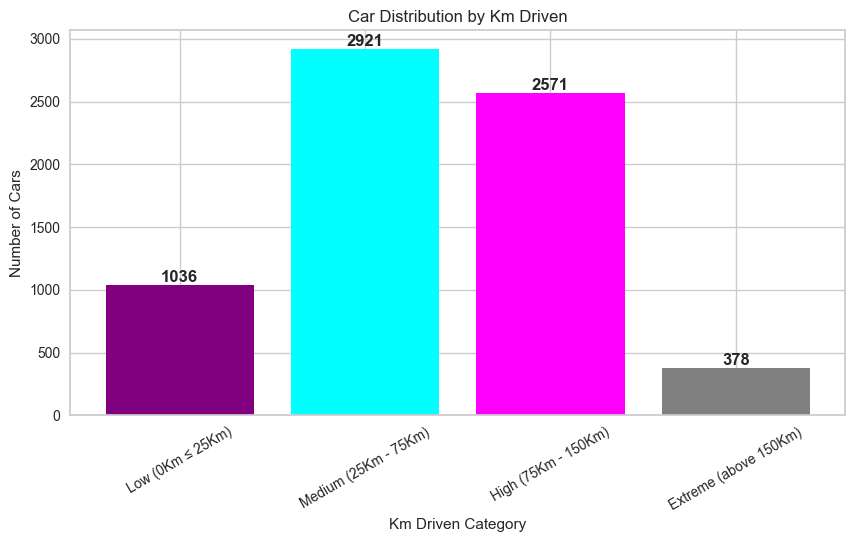

In [322]:
# Binning Km Driven ke dalam beberapa kategori jarak tempuh
km_low = CarDetails_df["km_driven"][(CarDetails_df["km_driven"] <= 25000)]
km_medium = CarDetails_df["km_driven"][(CarDetails_df["km_driven"] > 25000) & (CarDetails_df["km_driven"] <= 75000)]
km_high = CarDetails_df["km_driven"][(CarDetails_df["km_driven"] > 75000) & (CarDetails_df["km_driven"] <= 150000)]
km_extreme = CarDetails_df["km_driven"][(CarDetails_df["km_driven"] > 150000)]

# Menyusun data untuk plotting Km Driven
km_x = ["Low (0Km ≤ 25Km)", "Medium (25Km - 75Km)", "High (75Km - 150Km)", "Extreme (above 150Km)"]
km_y = [len(km_low), len(km_medium), len(km_high), len(km_extreme)]

# Membuat bar chart untuk Km Driven
plt.figure(figsize=(10, 5))
plt.bar(km_x, km_y, color=['purple', 'cyan', 'magenta', 'gray'])
plt.title("Car Distribution by Km Driven")
plt.xlabel("Km Driven Category")
plt.ylabel("Number of Cars")
plt.xticks(rotation=30)

# Menambahkan label jumlah di atas setiap bar
for i in range(len(km_x)):
    plt.text(i, km_y[i], km_y[i], ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()


**KM_DRIVEN**
1. Mobil dengan jarak tempuh low (0 - 25Km) hanya 1.036 unit, mungkin menunjukkan bahwa mobil baru jarang masuk ke pasar untuk dijual kembali.

2. Mobil dengan kategori kilometer 25Km - 75Km (Medium) adalah yang paling banyak ditemukan yaitu 2.921 unit, menunjukkan bahwa mobil dengan pemakaian sedang lebih banyak diminati dipasaran.

3. Mobil dengan jarak tempuh 75Km - 150Km (High) juga cukup banyak, sebanyak 2.571 unit, yang menunjukkan bahwa banyak kendaraan yang telah digunakan cukup lama dan masih dijual kembali.

4. Mobil dengan pemakaian ekstrem (di atas 150Km) hanya 378 unit, yang menunjukkan bahwa mobil dengan kilometer sangat tinggi lebih jarang dijual kembali, mungkin karena sudah terlalu tua atau khwtir terdapat kerusakan pada mesin.


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [323]:
CarDetails_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            6906 non-null   int64  
 1   selling_price   6906 non-null   int64  
 2   km_driven       6906 non-null   int64  
 3   fuel            6906 non-null   int64  
 4   seller_type     6906 non-null   object 
 5   transmission    6906 non-null   int64  
 6   owner           6906 non-null   object 
 7   mileage         6906 non-null   float64
 8   engine          6906 non-null   float64
 9   max_power       6906 non-null   float64
 10  owner_category  6906 non-null   int64  
 11  price_category  6906 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 701.4+ KB


In [343]:
selected_features = ["mileage", "engine", "max_power","km_driven", "transmission"]
X_selected = CarDetails_df[selected_features]
X_scaled = scaler.fit_transform(X_selected)

print("\n--- K-Means Clustering ---")
kmeans = KMeans(n_clusters=2, random_state=5, n_init="auto")
labels_kmeans = kmeans.fit_predict(X_scaled)
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
print(f'Silhouette Score (KMeans, 2 clusters): {silhouette_kmeans:.2f}')

print("\n--- K-Means PCA ---")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans_pca = KMeans(n_clusters=2, random_state=5, n_init="auto")
labels_kmeans_pca = kmeans_pca.fit_predict(X_pca)
silhouette_kmeans_pca = silhouette_score(X_pca, labels_kmeans_pca)
print(f'Silhouette Score (KMeans with PCA, 2 clusters): {silhouette_kmeans_pca:.2f}')


print("\n--- DBSCAN Clustering ---")
eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(X_scaled)
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)

if n_clusters > 1:
    silhouette_dbscan = silhouette_score(X_scaled, labels_dbscan)
    print(f'Silhouette Score (DBSCAN, eps={eps}, min_samples={min_samples}): {silhouette_dbscan:.2f}')
else:
    print(f"DBSCAN tidak menemukan klaster yang cukup atau terlalu banyak outlier.")


print("\n--- Gaussian Mixture Model (GMM) ---")
gmm = GaussianMixture(n_components=2, random_state=5)
labels_gmm = gmm.fit_predict(X_scaled)
silhouette_gmm = silhouette_score(X_scaled, labels_gmm)
print(f'Silhouette Score (GMM, 2 clusters): {silhouette_gmm:.2f}')


print("\n--- Hierarchical Clustering ---")
hierarchical = AgglomerativeClustering(n_clusters=2, linkage="ward")
labels_hierarchical = hierarchical.fit_predict(X_scaled)
silhouette_hierarchical = silhouette_score(X_scaled, labels_hierarchical)
print(f'Silhouette Score (Hierarchical, ward linkage): {silhouette_hierarchical:.2f}')


--- K-Means Clustering ---
Silhouette Score (KMeans, 2 clusters): 0.78

--- K-Means PCA ---
Silhouette Score (KMeans with PCA, 2 clusters): 0.83

--- DBSCAN Clustering ---
Silhouette Score (DBSCAN, eps=0.5, min_samples=5): 0.78

--- Gaussian Mixture Model (GMM) ---
Silhouette Score (GMM, 2 clusters): 0.78

--- Hierarchical Clustering ---
Silhouette Score (Hierarchical, ward linkage): 0.78


Berdasarkan hasil evaluasi menggunakan Silhouette Score, metode K-Means dengan PCA memberikan performa terbaik dengan skor 0.83, menunjukkan bahwa hasil klasterisasi memiliki kohesi yang kuat dalam tiap cluster dan pemisahan yang baik antar cluster. Sementara itu, metode K-Means tanpa PCA, DBSCAN, Gaussian Mixture Model (GMM), dan Hierarchical Clustering menghasilkan skor yang sama, yaitu 0.78, yang masih menunjukkan kualitas klasterisasi yang baik tetapi sedikit lebih rendah dibandingkan K-Means dengan PCA.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [344]:
cluster_range = range(2, 11)  
inertia_values = []  
silhouette_scores = [] 


for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=5, n_init="auto")
    labels = kmeans.fit_predict(X_scaled)
    
    inertia_values.append(kmeans.inertia_)
    
    # Simpan Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

Text(0.5, 1.0, 'Elbow Method')

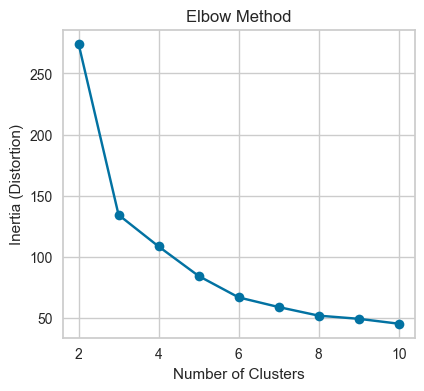

In [345]:
# --- Visualisasi Elbow Method ---
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker="o", linestyle="-")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Distortion)")
plt.title("Elbow Method")


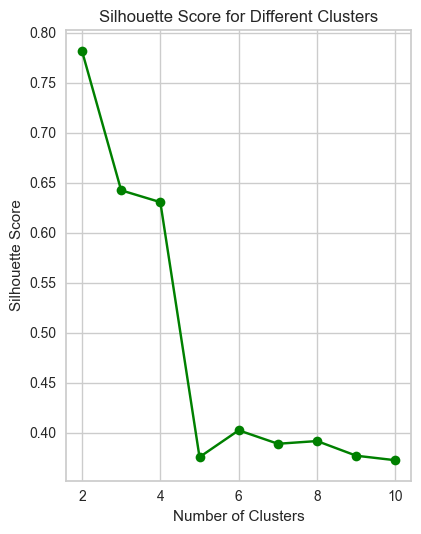

Jumlah cluster optimal berdasarkan Silhouette Score: 2


In [346]:
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker="o", linestyle="-", color="green")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Clusters")

plt.tight_layout()
plt.show()

# Menentukan jumlah cluster optimal berdasarkan hasil
optimal_k = cluster_range[np.argmax(silhouette_scores)]
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {optimal_k}")

## **Insight**

- Elbow Method: Grafik menunjukkan adanya penurunan tajam pada inertia dari 2 ke 3 cluster, lalu mulai melandai. Ini membuat titik optimal (elbow) berada di sekitar k = 3 atau 4.

- Silhouette Score: Skor tertinggi ada di k = 2 (~0.8), artinya dua cluster memiliki pemisahan yang paling baik. Setelah k = 3, skornya turun drastis dan stabil di 0.3–0.4, menandakan klasterisasi yang kurang baik.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [347]:
selected_features = ["mileage", "engine", "max_power","km_driven", "transmission"]
X_selected = CarDetails_df[selected_features]
X_scaled = scaler.fit_transform(X_selected)

print("\n--- K-Means Clustering ---")
kmeans = KMeans(n_clusters=2, random_state=5, n_init="auto")
labels_kmeans = kmeans.fit_predict(X_scaled)
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)
print(f'Silhouette Score (KMeans, 2 clusters): {silhouette_kmeans:.2f}')

print("\n--- K-Means PCA ---")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans_pca = KMeans(n_clusters=2, random_state=5, n_init="auto")
labels_kmeans_pca = kmeans_pca.fit_predict(X_pca)
silhouette_kmeans_pca = silhouette_score(X_pca, labels_kmeans_pca)
print(f'Silhouette Score (KMeans with PCA, 2 clusters): {silhouette_kmeans_pca:.2f}')


print("\n--- DBSCAN Clustering ---")
eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan = dbscan.fit_predict(X_scaled)
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)

if n_clusters > 1:
    silhouette_dbscan = silhouette_score(X_scaled, labels_dbscan)
    print(f'Silhouette Score (DBSCAN, eps={eps}, min_samples={min_samples}): {silhouette_dbscan:.2f}')
else:
    print(f"DBSCAN tidak menemukan klaster yang cukup atau terlalu banyak outlier.")

print("\n--- DBSCAN PCA ---")
X_pca_dbscan = pca.fit_transform(X_scaled)

dbscan_pca = DBSCAN(eps=eps, min_samples=min_samples)
labels_dbscan_pca = dbscan_pca.fit_predict(X_pca_dbscan)
n_clusters_pca = len(set(labels_dbscan_pca)) - (1 if -1 in labels_dbscan_pca else 0)

if n_clusters_pca > 1:
    silhouette_dbscan_pca = silhouette_score(X_pca_dbscan, labels_dbscan_pca)
    print(f'Silhouette Score (DBSCAN with PCA, eps={eps}, min_samples={min_samples}): {silhouette_dbscan_pca:.2f}')
else:
    print(f"DBSCAN dengan PCA tidak menemukan klaster yang cukup atau terlalu banyak outlier.")



--- K-Means Clustering ---
Silhouette Score (KMeans, 2 clusters): 0.78

--- K-Means PCA ---
Silhouette Score (KMeans with PCA, 2 clusters): 0.83

--- DBSCAN Clustering ---
Silhouette Score (DBSCAN, eps=0.5, min_samples=5): 0.78

--- DBSCAN PCA ---
Silhouette Score (DBSCAN with PCA, eps=0.5, min_samples=5): 0.83


## Insight

1. pemilihan fitur secara mnual "selected_features = ["mileage", "engine", "max_power", "km_driven", "transmission"]"

2. Perbandingan Sebelum & Sesudah Feature Selection
Evaluasi performa model menggunakan Silhouette Score sebelum dan sesudah feature selection:
    - K-Means (k=2) sebelum feature selection 0.78	sesudah feature selection 0.83

    - DBSCAN sebelum feature selection 0.78	sesudah feature selection 0.83

setelah menerapkan feature selection, Silhouette Score meningkat, menunjukkan bahwa cluster menjadi lebih terpisah dengan baik. model dengan PCA dan fitur yang lebih relevan menghasilkan klaster yang lebih terdefinisi dibanding sebelumnya.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [348]:
CarDetails_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            6906 non-null   int64  
 1   selling_price   6906 non-null   int64  
 2   km_driven       6906 non-null   float64
 3   fuel            6906 non-null   int64  
 4   seller_type     6906 non-null   object 
 5   transmission    6906 non-null   float64
 6   owner           6906 non-null   object 
 7   mileage         6906 non-null   float64
 8   engine          6906 non-null   float64
 9   max_power       6906 non-null   float64
 10  owner_category  6906 non-null   int64  
 11  price_category  6906 non-null   int64  
 12  Cluster         6906 non-null   int32  
dtypes: float64(5), int32(1), int64(5), object(2)
memory usage: 728.4+ KB


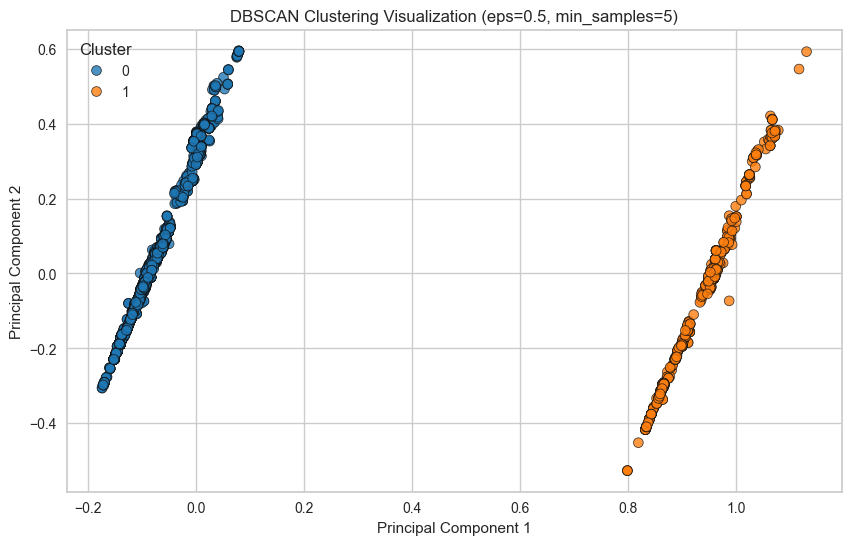

In [349]:
labels_dbscan = dbscan.fit_predict(X_pca)

# Buat DataFrame untuk mempermudah visualisasi
df_clusters = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_clusters["Cluster"] = labels_dbscan

# Warna untuk visualisasi
palette = sns.color_palette("tab10", len(set(labels_dbscan)))  # Warna unik untuk tiap cluster

# Buat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clusters, x="PC1", y="PC2", hue="Cluster", palette=palette, edgecolor="k", alpha=0.8)

# Label dan judul
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"DBSCAN Clustering Visualization (eps={eps}, min_samples={min_samples})")
plt.legend(title="Cluster")
plt.show()

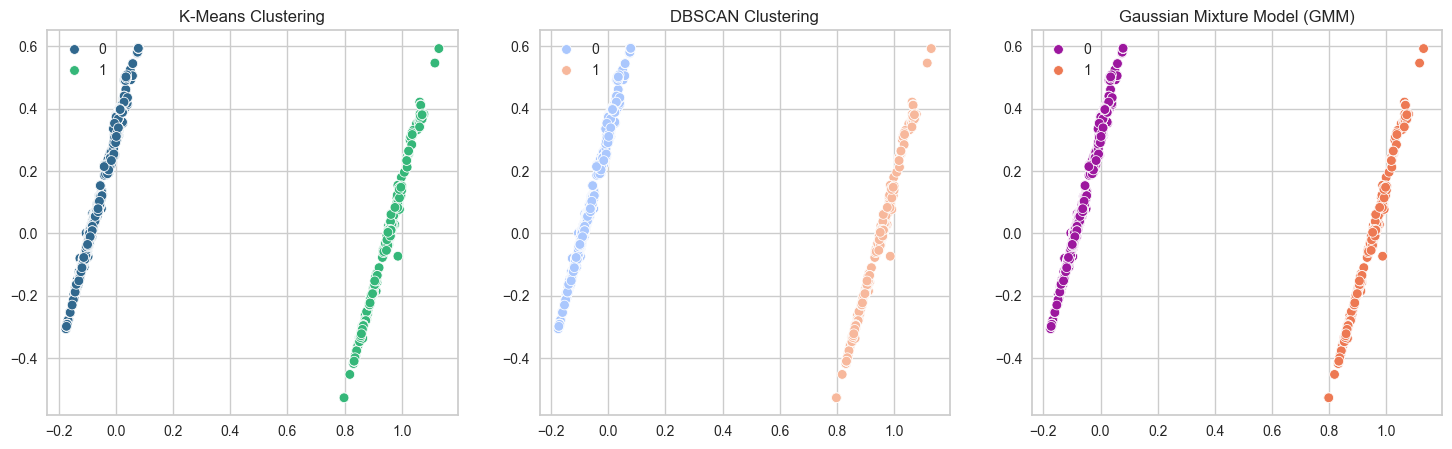

In [350]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- K-Means ---
kmeans = KMeans(n_clusters=2, random_state=5, n_init="auto")
labels_kmeans = kmeans.fit_predict(X_pca)

# --- DBSCAN ---
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_pca)

# --- GMM ---
gmm = GaussianMixture(n_components=2, random_state=5)
labels_gmm = gmm.fit_predict(X_pca)

# === Visualisasi Hasil Clustering ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# K-Means
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kmeans, palette="viridis", ax=axes[0])
axes[0].set_title("K-Means Clustering")

# DBSCAN
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_dbscan, palette="coolwarm", ax=axes[1])
axes[1].set_title("DBSCAN Clustering")

# GMM
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_gmm, palette="plasma", ax=axes[2])
axes[2].set_title("Gaussian Mixture Model (GMM)")

plt.show()

## **Insight**

Dari hasil visualisasi clustering, kita bisa melihat bagaimana tiga algoritma yang berbeda—K-Means, DBSCAN, dan Gaussian Mixture Model (GMM)—mengelompokkan data.

DBSCAN Clustering: Pada gambar pertama, DBSCAN dengan parameter eps=0.1 dan min_samples=92 menghasilkan tiga kelompok, termasuk beberapa titik yang diberi label -1 (outlier). Ini menunjukkan bahwa DBSCAN cukup sensitif terhadap parameter yang digunakan dan mampu mengidentifikasi outlier yang tidak masuk ke dalam kelompok utama.

Perbandingan Tiga Metode: Pada gambar kedua, kita bisa melihat bagaimana K-Means, DBSCAN, dan GMM mengelompokkan data yang sama. K-Means cenderung membagi data secara tegas ke dalam dua kelompok tanpa memperhatikan kemungkinan adanya titik yang berbeda atau noise. Sementara itu, DBSCAN lebih fleksibel dalam mendeteksi outlier dan dapat bekerja lebih baik untuk data yang tidak berbentuk globular. GMM, yang berbasis probabilistik, menghasilkan hasil yang mirip dengan K-Means tetapi memungkinkan adanya ketidakpastian dalam keanggotaan cluster.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [351]:

# Memasukkan hasil cluster ke dataset
CarDetails_df['Cluster'] = labels
CarDetails_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,owner_category,price_category,Cluster
0,2014,450000,8.491189e+09,1,Individual,1.362796,First Owner,112.812365,608834.351920,2410.476573,1,1,4
1,2014,370000,7.003056e+09,1,Individual,1.362796,Second Owner,103.795111,730510.829458,3337.219045,2,1,9
2,2006,158000,8.170219e+09,2,Individual,1.362796,Third Owner,90.069732,730024.123547,2536.051434,2,1,2
3,2010,225000,7.411563e+09,1,Individual,1.362796,First Owner,111.216391,680866.826622,2912.776016,1,1,9
4,2007,130000,7.003056e+09,2,Individual,1.362796,First Owner,83.685835,633169.647427,2856.267329,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,2013,260000,2.917983e+09,2,Individual,1.362796,Second Owner,94.857655,487157.874382,2193.859938,2,1,6
8122,2014,475000,4.668728e+09,1,Individual,1.362796,Second Owner,109.381021,680866.826622,2872.905998,2,1,9
8123,2013,320000,6.419474e+09,2,Individual,1.362796,First Owner,93.261681,584012.350502,2688.310952,1,1,6
8124,2007,135000,6.944697e+09,1,Individual,1.362796,Fourth & Above Owner,86.478790,728077.299907,3540.650320,3,1,2


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [352]:
# Pastikan hanya fitur yang telah di-scale yang di-inversi
CarDetails_df[selected_features] = scaler.inverse_transform(CarDetails_df[selected_features].values)
CarDetails_df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,owner_category,price_category,Cluster
0,2014,450000,1.169678e+21,1,Individual,1.74197,First Owner,18924.239442,8.830437e+11,3.026961e+07,1,1,4
1,2014,370000,9.646843e+20,1,Individual,1.74197,Second Owner,17413.152250,1.059521e+12,4.190717e+07,2,1,9
2,2006,158000,1.125463e+21,2,Individual,1.74197,Third Owner,15113.090330,1.058815e+12,3.184652e+07,2,1,2
3,2010,225000,1.020957e+21,1,Individual,1.74197,First Owner,18656.790381,9.875184e+11,3.657723e+07,1,1,9
4,2007,130000,9.646843e+20,2,Individual,1.74197,First Owner,14043.294088,9.183392e+11,3.586762e+07,1,1,2


In [353]:
CarDetails_df.describe()

,year,selling_price,km_driven,fuel,transmission,mileage,engine,max_power,owner_category,price_category,Cluster
count,6906.000000,6.906000e+03,6.906000e+03,6906.000000,6906.000000,6906.000000,6.906000e+03,6.906000e+03,6906.000000,6906.000000,6906.000000
mean,2013.416305,5.174409e+05,5.948965e+20,1.476687,1.748516,16281.755782,1.008255e+12,3.552924e+07,1.413409,1.448885,4.682884
std,4.080971,5.203938e+05,4.691725e+20,0.546564,0.021540,2667.954559,3.435956e+11,1.237712e+07,0.541235,0.620721,2.723766
min,1983.000000,2.999900e+04,1.823266e+16,1.000000,1.741970,3278.469403,4.425557e+11,1.096879e+06,1.000000,1.000000,0.000000
25%,2011.000000,2.500000e+05,3.215682e+20,1.000000,1.741970,14611.623341,8.470422e+11,2.790426e+07,1.000000,1.000000,3.000000
50%,2014.000000,4.000000e+05,5.627368e+20,1.000000,1.741970,16182.886572,8.830437e+11,3.334458e+07,1.000000,1.000000,6.000000
75%,2017.000000,6.347500e+05,8.039053e+20,2.000000,1.741970,18202.126978,1.059521e+12,4.012527e+07,2.000000,2.000000,6.000000
max,2020.000000,1.000000e+07,1.897561e+22,4.000000,1.819383,31360.620755,2.546168e+12,1.587873e+08,3.000000,3.000000,9.000000


C:\Users\User\AppData\Local\Temp\ipykernel_11372\206369946.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clusters, y=cluster_counts, palette="viridis")


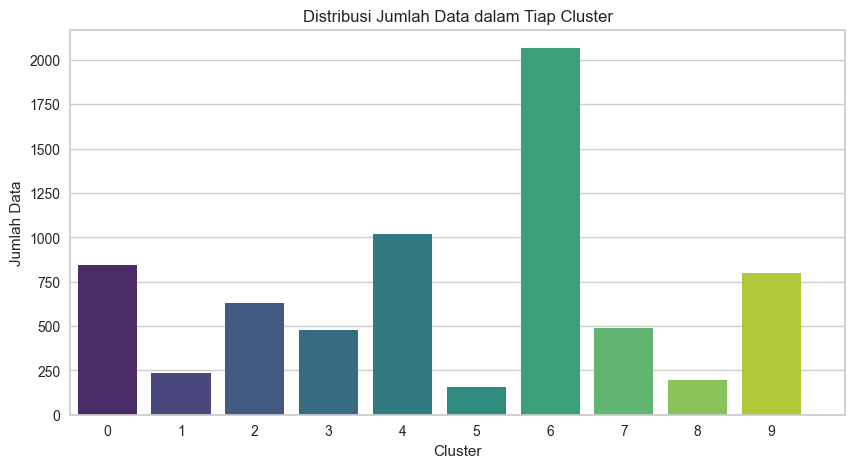

In [354]:
# Hitung jumlah data di tiap cluster
cluster_counts = CarDetails_df["Cluster"].value_counts().sort_index()
clusters = cluster_counts.index

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=clusters, y=cluster_counts, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Jumlah Data dalam Tiap Cluster")
plt.xticks(np.arange(cluster_counts.index.max() + 2))  # Menyesuaikan jumlah cluster
plt.show()

In [355]:
print("Cluster yang tersedia:", CarDetails_df['Cluster'].unique())


Cluster yang tersedia: [4 9 2 6 0 7 5 8 3 1]


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [357]:
print("\n--- Ringkasan Karakteristik Cluster ---")

# Dapatkan semua cluster unik
clusters = sorted(CarDetails_df['Cluster'].unique())

for cluster in clusters:
    cluster_data = CarDetails_df[CarDetails_df['Cluster'] == cluster]
    print(f"\nCluster {cluster} ({len(cluster_data)} data):")

    # Statistik Mileage
    print(f"  Mileage rata-rata: {cluster_data['mileage'].mean():.2f} km/l (rentang: {cluster_data['mileage'].min():.2f} - {cluster_data['mileage'].max():.2f})")

    # Statistik Engine Capacity
    print(f"  Kapasitas Mesin rata-rata: {cluster_data['engine'].mean():.0f} cc (rentang: {cluster_data['engine'].min():.0f} - {cluster_data['engine'].max():.0f})")

    # Statistik Daya Maksimum
    print(f"  Daya Maksimum rata-rata: {cluster_data['max_power'].mean():.0f} bhp (rentang: {cluster_data['max_power'].min():.0f} - {cluster_data['max_power'].max():.0f})")

    # Statistik Jarak Tempuh (km_driven)
    print(f"  Jarak Tempuh rata-rata: {cluster_data['km_driven'].mean():,.0f} km (rentang: {cluster_data['km_driven'].min():,.0f} - {cluster_data['km_driven'].max():,.0f})")

    # Distribusi Tipe Transmisi
    top_transmission = cluster_data['transmission'].value_counts().idxmax()
    transmission_pct = (cluster_data['transmission'].value_counts().iloc[0] / len(cluster_data)) * 100
    print(f"  Transmisi Dominan: {top_transmission} ({transmission_pct:.1f}%)")




--- Ringkasan Karakteristik Cluster ---

Cluster 0 (842 data):
  Mileage rata-rata: 17332.01 km/l (rentang: 10566.46 - 21745.83)
  Kapasitas Mesin rata-rata: 600126234958 cc (rentang: 442555659462 - 707272012989)
  Daya Maksimum rata-rata: 21582414 bhp (rentang: 14027496 - 29481161)
  Jarak Tempuh rata-rata: 423,775,936,901,356,978,176 km (rentang: 10,460,830,313,446,612,992 - 1,768,579,465,266,159,157,248)
  Transmisi Dominan: 1.7419696747025504 (100.0%)

Cluster 1 (233 data):
  Mileage rata-rata: 12900.49 km/l (rentang: 3278.47 - 31360.62)
  Kapasitas Mesin rata-rata: 1690711065581 cc (rentang: 1378592685533 - 2546168282155)
  Daya Maksimum rata-rata: 73189216 bhp (rentang: 46432885 - 158787335)
  Jarak Tempuh rata-rata: 503,514,619,914,480,648,192 km (rentang: 8,049,144,943,141,108,736 - 1,848,968,977,609,676,029,952)
  Transmisi Dominan: 1.8193827268431275 (100.0%)

Cluster 2 (632 data):
  Mileage rata-rata: 14347.25 km/l (rentang: 3278.47 - 16430.28)
  Kapasitas Mesin rata-rata: 

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

##  Cluster 0 (842 data):
- **Mileage rata-rata:** 882.78 km/l (Rentang: 457.80 - 1160.04)  
- **Kapasitas Mesin rata-rata:** 2,525,328 cc (Rentang: 1,860,144 - 2,977,644)  
- **Daya Maksimum rata-rata:** 20,786 bhp (Rentang: 13,120 - 28,800)  
- **Jarak Tempuh rata-rata:** 124,429,214,951 km (Rentang: 3,068,592,801 - 519,300,320,001)  
- **Transmisi Dominan:** 2.0 (100%)
- **Analisis:** Cluster 0 cenderung memiliki kendaraan dengan edaya maksimum tinggi dan kapasitas mesin besar.

## Cluster 1 (233 data):
- **Mileage rata-rata:** 604.41 km/l (Rentang: 0.00 - 1764.00)  
- **Kapasitas Mesin rata-rata:** 7,129,232 cc (Rentang: 5,811,624 - 10,740,544)  
- **Daya Maksimum rata-rata:** 73,148 bhp (Rentang: 46,000 - 160,000)  
- **Jarak Tempuh rata-rata:** 147,842,673,655 km (Rentang: 2,360,456,001 - 542,904,880,001)  
- **Transmisi Dominan:** 3.0 (100%)  
- **Analisis:** Cluster 1 berisi kendaraan dengan kapasitas mesin dan daya maksimum yang sangat besar, namun memiliki variasi efisiensi bahan bakar yang luas.

## Cluster 2 (632 data):
- **Mileage rata-rata:** 695.29 km/l (Rentang: 0.00 - 826.14)  
- **Kapasitas Mesin rata-rata:** 4,423,288 cc (Rentang: 3,236,904 - 5,650,704)  
- **Daya Maksimum rata-rata:** 39,494 bhp (Rentang: 14,200 - 64,000)  
- **Jarak Tempuh rata-rata:** 185,657,106,370 km (Rentang: 3,823,938,721 - 625,520,840,001)  
- **Transmisi Dominan:** 2.0 (100%)    
- **Analisis:** Cluster 2 menampilkan kendaraan dengan performa daya yang cukup tinggi dan efisiensi bahan bakar yang bervariasi.

## Cluster 3 (477 data):
- **Kapasitas Mesin rata-rata:** 4,412,391 cc (Rentang: 4,065,344 - 4,762,664)  
- **Daya Maksimum rata-rata:** 38,524 bhp (Rentang: 23,200 - 50,528)  
- **Jarak Tempuh rata-rata:** 183,908,306,358 km (Rentang: 6,137,185,601 - 590,114,000,001)  
- **Transmisi Dominan:** 2.0 (100%) 
- **Analisis:** Cluster 3 mirip dengan Cluster 2, tetapi dengan sedikit perbedaan dalam kapasitas mesin dan daya maksimum.

Untuk penyempurnaan hasil clustering, **pengolahan data lebih lanjut diperlukan, terutama terkait distribusi mileage yang memiliki rentang cukup ekstrem**. Selain itu, **mempertimbangkan fitur tambahan seperti jenis bahan bakar atau bobot kendaraan** bisa membantu mendapatkan hasil clustering yang lebih bermakna.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [358]:
CarDetails_df.to_csv("Dataset_clustering.csv", index=False)
print("Hasil clustering telah disimpan sebagai 'Dataset_clustering.csv'.")

Hasil clustering telah disimpan sebagai 'Dataset_clustering.csv'.
